In [1]:
import numpy as np
import pandas as pd
import re
import whois
import google
from bs4 import BeautifulSoup
import urllib.request
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
from urllib.parse import urlparse

In [2]:
urldata =pd.read_csv("url.csv")
urldata.tail(10)

,url,label
97,https://www.architecticastartups.com/,good
98,https://www.techsimplus.com/TechSim_Internship...,good
99,https://www.preservearticles.com/short-essays/...,good
100,https://www.kopykitab.com/blog/category/questi...,good
101,http://192.168.43.112/virus.exe,bad
102,http://172.149.1.61/payload.exe,bad
103,http://signin.paypal.com@10.19.32.4/o,bad
104,http://63.17.167.23/pc/verification.htm?=https...,bad
105,http://example.com/redirect.php?dest=https://1...,bad
106,http://https-items.com,bad


In [3]:
# Protocol
def Protocol(url):
    x= urlparse(url).scheme
    if x=='http':
        return 1
    elif x=='https':
        return 0
    
urldata['protocol']= urldata['url'].apply(lambda i: Protocol(i))

In [4]:
urldata.head()

,url,label,protocol
0,https://www.google.com/,good,0
1,https://www.amazon.in/gp/product/B07N6LN57W,good,0
2,http://aot.edu.in/campus-communities/,good,1
3,https://abc.com/,good,0
4,https://community.letsupgrade.in/group/blockchain,good,0


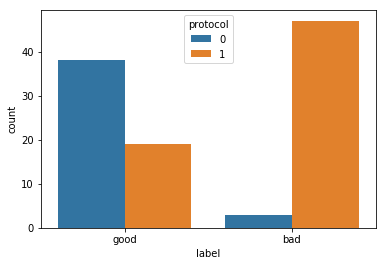

In [5]:
sns.countplot(x='label', hue='protocol', data=urldata)

In [6]:
urldata[urldata['protocol']==0]

,url,label,protocol
0,https://www.google.com/,good,0
1,https://www.amazon.in/gp/product/B07N6LN57W,good,0
3,https://abc.com/,good,0
4,https://community.letsupgrade.in/group/blockchain,good,0
5,https://drive.google.com/drive/u/0/,good,0
6,https://www.educative.io/courses/natural-langu...,good,0
7,https://edusaint.com/school/#/learnsection,good,0
8,https://www.flipkart.com/,good,0
9,https://github.com/roubis09/BloodDonationWebsi...,good,0
10,https://www.hoichoi.tv/webseries/tansener-tanpura,good,0


In [7]:
# length 0f url
urldata['length']= urldata['url'].apply(lambda i: len(i))

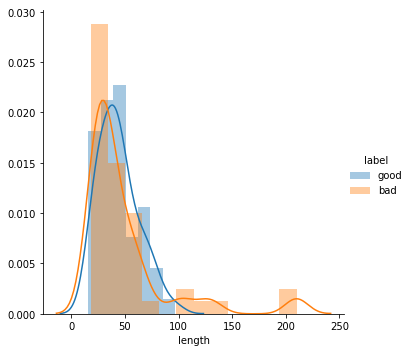

In [81]:
sns.FacetGrid(urldata, hue="label", height=5).map(sns.distplot, "length").add_legend()
plt.show()

In [82]:
urldata[urldata['length']>100]

,url,label,protocol,length
56,http://nnconsultoria.com.br/Atendimento.Pessoa...,bad,1,106
74,https://www.udemy.com/courses/search/?src=ukw&...,bad,0,133
75,http://abhishekgroup.co.in/wp-http/hanmail/log...,bad,1,210
76,http://abhishekgroup.co.in/wp-http/hanmail/log...,bad,1,210
77,https://www.woodlandworldwide.com/collections/...,bad,0,124


In [83]:
def count(url):
    res= url.count('-')+url.count('@')+url.count('?')+url.count('%')+url.count('.')+url.count('=')+url.count('<')+url.count('>')+url.count('src')+url.count('img')+url.count('script')+url.count('body')
    return res

urldata['count']= urldata['url'].apply(lambda i: count(i))

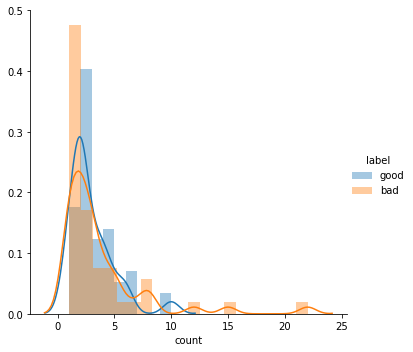

In [84]:
sns.FacetGrid(urldata, hue="label", height=5).map(sns.distplot, "count").add_legend()
plt.show()

In [85]:
urldata[urldata['count']>10]

,url,label,protocol,length,count
62,https://www.udemy.com/courses/search/?src=ukw&...,bad,0,98,15
74,https://www.udemy.com/courses/search/?src=ukw&...,bad,0,133,22
77,https://www.woodlandworldwide.com/collections/...,bad,0,124,12


In [86]:
urldata.head()

,url,label,protocol,length,count
0,https://www.google.com/,good,0,23,2
1,https://www.amazon.in/gp/product/B07N6LN57W,good,0,43,2
2,http://aot.edu.in/campus-communities/,good,1,37,3
3,https://abc.com/,good,0,16,1
4,https://community.letsupgrade.in/group/blockchain,good,0,49,2


In [87]:
urldata.tail()

,url,label,protocol,length,count
102,http://172.149.1.61/payload.exe,bad,1,31,4
103,http://signin.paypal.com@10.19.32.4/o,bad,1,37,6
104,http://63.17.167.23/pc/verification.htm?=https...,bad,1,64,8
105,http://example.com/redirect.php?dest=https://1...,bad,1,58,7
106,http://https-items.com,bad,1,22,2


In [88]:
urldata['count-www']= urldata['url'].apply(lambda i: i.count('www'))

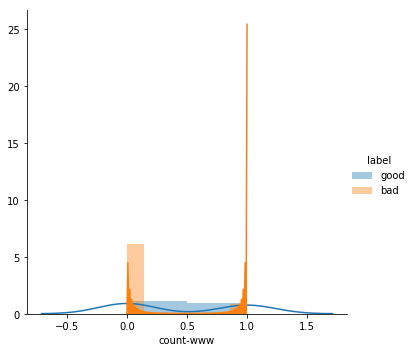

In [89]:
sns.FacetGrid(urldata, hue="label", height=5).map(sns.distplot, "count-www").add_legend()
plt.show()

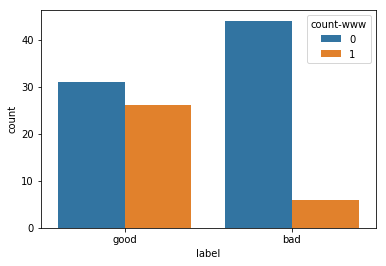

In [90]:
sns.countplot(x='label', hue='count-www', data=urldata)

In [91]:
urldata[urldata['count-www']==1]

,url,label,protocol,length,count,count-www
0,https://www.google.com/,good,0,23,2,1
1,https://www.amazon.in/gp/product/B07N6LN57W,good,0,43,2,1
6,https://www.educative.io/courses/natural-langu...,good,0,75,5,1
8,https://www.flipkart.com/,good,0,25,2,1
10,https://www.hoichoi.tv/webseries/tansener-tanpura,good,0,49,3,1
11,https://www.hackerrank.com/access-account/?h_r...,good,0,65,6,1
12,https://www.hotstar.com/in/movies/chhichhore/1...,good,0,55,2,1
15,https://www.jdoodle.com/guru,good,0,28,2,1
16,https://www.kaggle.com/akashkr/phishing-websit...,good,0,55,4,1
20,https://www.mywbut.com/syllabus/paper/615/dept/2/,good,0,49,2,1


In [92]:
def digit_count(url):
    digit= 0
    for i in url:
        if i.isnumeric():
            digit+=1
    return digit
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

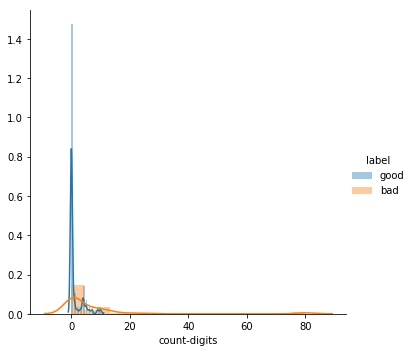

In [93]:
sns.FacetGrid(urldata, hue="label", height=5).map(sns.distplot, "count-digits").add_legend()
plt.show()

In [94]:
urldata[urldata['count-digits']>=12]

,url,label,protocol,length,count,count-www,count-digits
45,http://183.183.97.55/10.mov,bad,1,27,4,0,12
48,http://91.239.24.132:6892,bad,1,25,3,0,14
49,http://13453765871837679316.googlegroups.com/a...,bad,1,59,2,0,24
51,http://133.130.103.10/21/logar/,bad,1,31,3,0,13
65,http:////al/alibaba21012015/alibaba21012015/66...,bad,1,58,1,0,19
75,http://abhishekgroup.co.in/wp-http/hanmail/log...,bad,1,210,8,0,80
76,http://abhishekgroup.co.in/wp-http/hanmail/log...,bad,1,210,8,0,80


In [95]:
# url is ip address or not
def having_ip_address(url):
    match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  #IPv4
                    '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  #IPv4 in hexadecimal
                    '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)     #Ipv6
    if match:
        #print match.group()
        return 1
    else:
        #print 'No matching pattern found'
        return 0

urldata['use_of_ip']= urldata['url'].apply(lambda i: having_ip_address(i))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



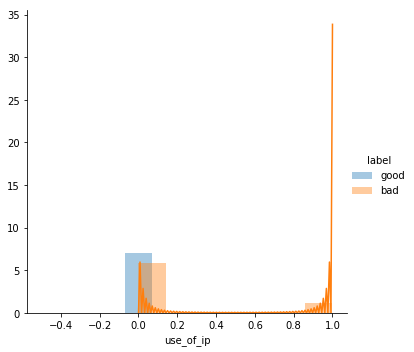

In [96]:
sns.FacetGrid(urldata, hue="label", height=5).map(sns.distplot, "use_of_ip").add_legend()
plt.show()

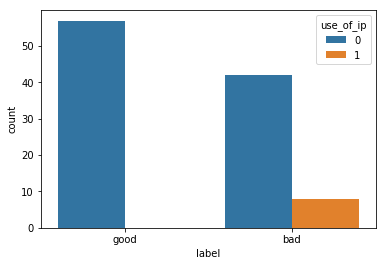

In [97]:
sns.countplot(x='label', hue='use_of_ip', data=urldata)

In [98]:
# To check any shortening service is used or not
def shortening_service(url):
    match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',url)
    if match:
        return 1
    else:
        return 0

urldata['shortening_service'] = urldata['url'].apply(shortening_service)

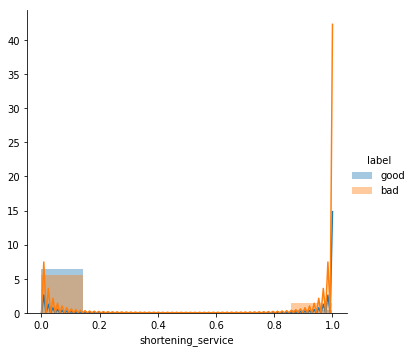

In [99]:
sns.FacetGrid(urldata, hue="label", height=5).map(sns.distplot, "shortening_service").add_legend()
plt.show()

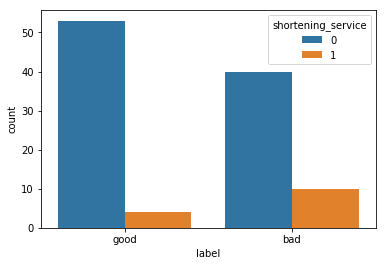

In [100]:
sns.countplot(x='label', hue='shortening_service', data=urldata)

In [101]:
urldata[urldata['shortening_service']==1]

,url,label,protocol,length,count,count-www,count-digits,use_of_ip,shortening_service
7,https://edusaint.com/school/#/learnsection,good,0,42,1,0,0,0,1
8,https://www.flipkart.com/,good,0,25,2,1,0,0,1
20,https://www.mywbut.com/syllabus/paper/615/dept/2/,good,0,49,2,1,4,0,1
26,https://student.detailedassessment.com/,good,0,39,2,0,0,0,1
32,http://diaryofagameaddict.com/,bad,1,30,1,0,0,0,1
34,http://iamagameaddict.com/,bad,1,26,1,0,0,0,1
37,http://sn-gzzx.com,bad,1,18,2,0,0,0,1
58,http://tinyurl.com/le5tcvf,bad,1,26,1,0,1,0,1
59,http://tinyurl.com/ll59xhm,bad,1,26,1,0,2,0,1
60,http://thehotelmanagment.com/Prime/,bad,1,35,1,0,0,0,1


In [102]:
# HTTPS TOKEN IN URL
def https_token(url):
    match=re.search('https://|http://',url)
    if match.start(0)==0:
        url=url[match.end(0):]
    
    match=re.search('http|https',url)
    if match:
        return 1
    else:
        return 0
    
urldata['https_token'] = urldata['url'].apply(lambda i: https_token(i))

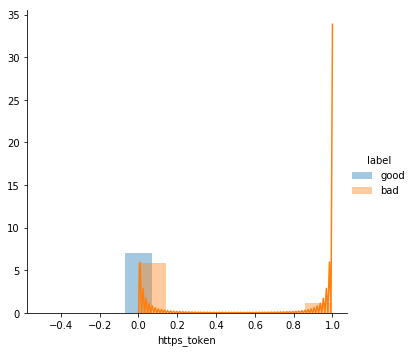

In [103]:
sns.FacetGrid(urldata, hue="label", height=5).map(sns.distplot, "https_token").add_legend()
plt.show()

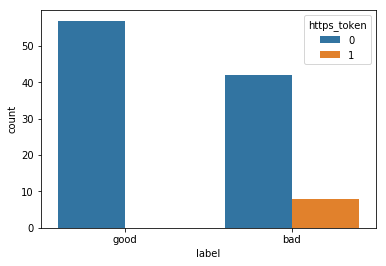

In [104]:
sns.countplot(x='label', hue='https_token', data=urldata)

In [8]:
# To check Domain name is included in the url

def abnormal_url_sub(domain,url):
    try:
        try:
            hostname=domain["domain_name"].lower()
        except:
            hostname=domain["domain_name"][0].lower()
    except:
        return 1
    
    #print(hostname)
    match=re.search(hostname,url)
    if match:
        #print(0)
        return 0
    else:
        #print(1)
        return 1
    
def abnormal_url_main(url):
    dns = 0
    try:
        domain_name = whois.whois(url)
        # print(domain_name["domain_name"])
    except:
        dns = 1
        #print('1dns')
        
    if dns == 1:
        return 1
    else:
        return abnormal_url_sub(domain_name,url)
    
urldata['include_domain']= urldata['url'].apply(lambda i: abnormal_url_main(i))

Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket


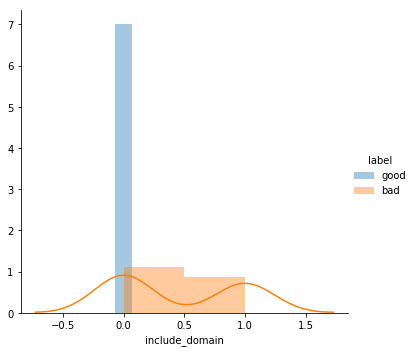

In [106]:
sns.FacetGrid(urldata, hue="label", height=5).map(sns.distplot, "include_domain").add_legend()
plt.show()

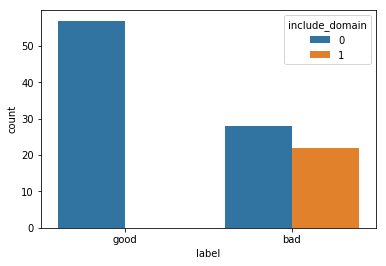

In [107]:
sns.countplot(x='label', hue='include_domain', data=urldata)

In [108]:
urldata[urldata['include_domain']==1]

,url,label,protocol,length,count,count-www,count-digits,use_of_ip,shortening_service,https_token,include_domain
33,http://espdesign.com.au/,bad,1,24,2,0,0,0,0,0,1
42,http://rl8vd.kikul.com/ci7ka5t2ue,bad,1,33,2,0,4,0,0,0,1
45,http://183.183.97.55/10.mov,bad,1,27,4,0,12,1,0,0,1
46,http://asecwitlecn.bid/read.php?f=0.dat,bad,1,39,5,0,1,0,0,0,1
47,http://90.2.1.14:6892,bad,1,21,3,0,10,0,0,0,1
48,http://91.239.24.132:6892,bad,1,25,3,0,14,0,0,0,1
51,http://133.130.103.10/21/logar/,bad,1,31,3,0,13,1,0,0,1
53,http://caixa.com.br.fgtsagendesaqueconta.com/c...,bad,1,74,5,0,7,0,0,0,1
55,http://dh16.co.vu/css//,bad,1,23,2,0,2,0,0,0,1
60,http://thehotelmanagment.com/Prime/,bad,1,35,1,0,0,0,1,0,1


In [109]:
from bs4 import BeautifulSoup
import urllib.request
def web_traffic(url):
    try:
        rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
    except TypeError:
        return 1
    rank= int(rank)
    if (rank<7000000):
        return 0
    else:
        return 2
    
urldata['web_traffic']= urldata['url'].apply(lambda i: web_traffic(i))

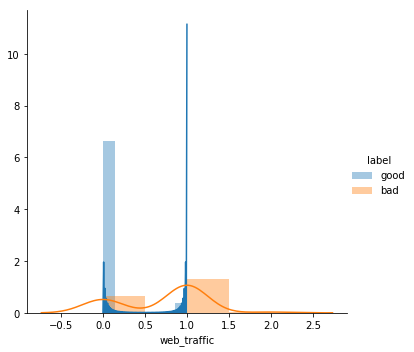

In [110]:
sns.FacetGrid(urldata, hue="label", height=5).map(sns.distplot, "web_traffic").add_legend()
plt.show()

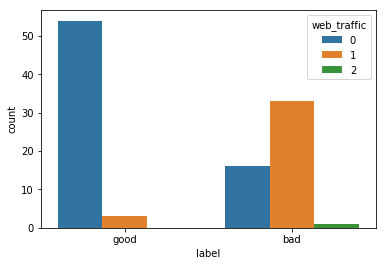

In [111]:
sns.countplot(x='label', hue='web_traffic', data=urldata)

In [112]:
urldata[urldata['web_traffic']==2]

,url,label,protocol,length,count,count-www,count-digits,use_of_ip,shortening_service,https_token,include_domain,web_traffic
32,http://diaryofagameaddict.com/,bad,1,30,1,0,0,0,1,0,0,2


In [113]:
# Domain Registration Length
import whois
from datetime import datetime
import time
def domain_registration_length_sub(domain):
    expiration_date = domain.expiration_date
    today = time.strftime('%Y-%m-%d')
    today = datetime.strptime(today, '%Y-%m-%d')
        
    if expiration_date is None:
        return 0
            
    else:
        if type(expiration_date) is list :
#                 print(expiration_date[0])
            expiration_date= expiration_date[0]
#             print(today[0])
#             return -1             #If it is a type of list then we can't select a single value from list. So,it is regarded as suspected website  
        if type(today) is list:
            today= today[0]
#                 print(today[0])
            
        registration_length = abs((expiration_date - today).days)
    #         if registration_length>3000:
    #             registration_length=0
        return int(registration_length/30)
    #         if registration_length / 365 <= 1:
    #             return 1
    #         else:
    #             return 0

def domain_registration_length_main(domain):
    dns = 0
    try:
        domain_name = whois.whois(domain)
    except:
        dns = 1

    if dns == 1:
        return 0
    else:
        return domain_registration_length_sub(domain_name)

    
urldata['registration_length']= urldata['url'].apply(lambda i: domain_registration_length_main(i))

Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket


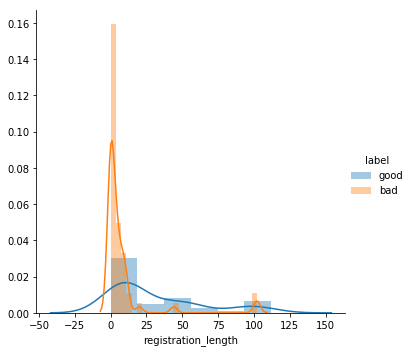

In [114]:
sns.FacetGrid(urldata, hue="label", height=5).map(sns.distplot, "registration_length").add_legend()
plt.show()

In [115]:
urldata[urldata['registration_length']>20]

,url,label,protocol,length,count,count-www,count-digits,use_of_ip,shortening_service,https_token,include_domain,web_traffic,registration_length
0,https://www.google.com/,good,0,23,2,1,0,0,0,0,0,0,98
1,https://www.amazon.in/gp/product/B07N6LN57W,good,0,43,2,1,5,0,0,0,0,0,42
2,http://aot.edu.in/campus-communities/,good,1,37,3,0,0,0,0,0,0,0,45
5,https://drive.google.com/drive/u/0/,good,0,35,2,0,1,0,0,0,0,0,98
8,https://www.flipkart.com/,good,0,25,2,1,0,0,1,0,0,0,58
10,https://www.hoichoi.tv/webseries/tansener-tanpura,good,0,49,3,1,0,0,0,0,0,0,29
11,https://www.hackerrank.com/access-account/?h_r...,good,0,65,6,1,1,0,0,0,0,0,45
17,https://jiscollege.ac.in/pdf/aceven2019-20.pdf,good,0,46,4,0,6,0,0,0,0,0,57
21,https://nextstep.tcs.com/campus/#/,good,0,34,2,0,0,0,0,0,0,0,112
22,https://olympus.greatlearning.in/learner_dashb...,good,0,50,2,0,0,0,0,0,0,0,50


In [3]:
# urldata.to_csv("Urls_Updated1.csv",index=False,encoding='UTF-8')

In [9]:
urldata1= pd.read_csv("Urls_Updated1.csv")
urldata1.head(10)

,url,label,protocol,length,count,count-www,count-digits,use_of_ip,shortening_service,https_token,include_domain,web_traffic,registration_length
0,https://www.google.com/,good,0,23,2,1,0,0,0,0,0,0,98
1,https://www.amazon.in/gp/product/B07N6LN57W,good,0,43,2,1,5,0,0,0,0,0,42
2,http://aot.edu.in/campus-communities/,good,1,37,3,0,0,0,0,0,0,0,45
3,https://abc.com/,good,0,16,1,0,0,0,0,0,0,0,9
4,https://community.letsupgrade.in/group/blockchain,good,0,49,2,0,0,0,0,0,0,0,7
5,https://drive.google.com/drive/u/0/,good,0,35,2,0,1,0,0,0,0,0,98
6,https://www.educative.io/courses/natural-langu...,good,0,75,5,1,4,0,0,0,0,0,12
7,https://edusaint.com/school/#/learnsection,good,0,42,1,0,0,0,1,0,0,0,0
8,https://www.flipkart.com/,good,0,25,2,1,0,0,1,0,0,0,58
9,https://github.com/roubis09/BloodDonationWebsi...,good,0,55,1,0,2,0,0,0,0,0,1


# MAKING THE ML MODEL

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from sklearn.linear_model import LogisticRegression

In [11]:
urldata1.head()

,url,label,protocol,length,count,count-www,count-digits,use_of_ip,shortening_service,https_token,include_domain,web_traffic,registration_length
0,https://www.google.com/,good,0,23,2,1,0,0,0,0,0,0,98
1,https://www.amazon.in/gp/product/B07N6LN57W,good,0,43,2,1,5,0,0,0,0,0,42
2,http://aot.edu.in/campus-communities/,good,1,37,3,0,0,0,0,0,0,0,45
3,https://abc.com/,good,0,16,1,0,0,0,0,0,0,0,9
4,https://community.letsupgrade.in/group/blockchain,good,0,49,2,0,0,0,0,0,0,0,7


In [12]:
X= urldata1.drop(['url', 'label'], axis=1)
y= urldata1['label']

In [13]:
X.shape
y.shape

(107,)

In [14]:
dt_model= LogisticRegression(solver= "liblinear")
dt_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X,y)
# y_model = model.predict(Xtest)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree_model= DecisionTreeClassifier()
tree_model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# INPUT WEBSITE

In [17]:
def website(site):
    from urllib.parse import urlparse
    from tld import get_tld
    import os.path
    import re
    
    # Protocol
    # Protocol
    def Protocol(url):
        x= urlparse(url).scheme
        if x=='http':
            return 1
        elif x=='https':
            return 0
    protocol= Protocol(site)
    
    # length 0f url
    length= len(str(site))
    
    def count(url):
        res= url.count('-')+url.count('@')+url.count('?')+url.count('%')+url.count('.')+url.count('=')+url.count('<')+url.count('>')+url.count('src')+url.count('img')+url.count('script')+url.count('body')
        return res
    count= count(site)
    
    count_www = site.count('www')
    
    def digit_count(url):
        digit= 0
        for i in url:
            if i.isnumeric():
                digit+=1
        return digit
    count_digits= digit_count(site)
    
    # url is ip address or not
    def having_ip_address(url):
        match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  #IPv4
                        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  #IPv4 in hexadecimal
                        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)     #Ipv6
        if match:
            #print match.group()
            return 1
        else:
            #print 'No matching pattern found'
            return 0
    use_of_ip= having_ip_address(site)
    
    # To check any shortening service is used or not
    def shortening_service(url):
        match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                        'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                        'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                        'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                        'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                        'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                        'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',url)
        if match:
            return 1
        else:
            return 0

    shortening_service = shortening_service(site)
    
    # HTTPS TOKEN IN URL
    def https_token(url):
        match=re.search('https://|http://',url)
        if match.start(0)==0:
            url=url[match.end(0):]

        match=re.search('http|https',url)
        if match:
            return 1
        else:
            return 0

    https_token = https_token(site)
    
    # To check Domain name is included in the url

#     def abnormal_url_sub1(domain,url):
#         try:
#             try:
#                 hostname=domain["domain_name"].lower()
#                 print(hostname)
#             except:
#                 hostname=domain["domain_name"][0].lower()
#                 print(hostname)
#         except:
#             return 1

#         #print(hostname)
#         match=re.search(hostname,url)
#         if match:
#             #print(0)
#             return 0
#         else:
#             print('1else')
#             return 1

#     def abnormal_url_main1(url):
#         dns = 0
#         try:
#             domain_name = whois.whois(url)
#             # print(domain_name["domain_name"])
#         except:
#             dns = 1
#             print('1dns')

#         if dns == 1:
#             return 1
#         else:
#             return abnormal_url_sub1(domain_name,url)
    
    include_domain= abnormal_url_main(site)
    
    from bs4 import BeautifulSoup
    import urllib.request
    def web_traffic(url):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
        except TypeError:
            return 1
        rank= int(rank)
        if (rank<9000000):
            return 0
        else:
            return 2

    web_traffic= web_traffic(site)
    
    # Domain Registration Length
    import whois
    from datetime import datetime
    import time
    def domain_registration_length_sub(domain):
        expiration_date = domain.expiration_date
        today = time.strftime('%Y-%m-%d')
        today = datetime.strptime(today, '%Y-%m-%d')
        
        if expiration_date is None:
            return 0
            
        else:
            if type(expiration_date) is list :
#                 print(expiration_date[0])
                expiration_date= expiration_date[0]
#             print(today[0])
#             return -1             #If it is a type of list then we can't select a single value from list. So,it is regarded as suspected website  
            if type(today) is list:
                today= today[0]
#                 print(today[0])
            
            registration_length = abs((expiration_date - today).days)
    #         if registration_length>3000:
    #             registration_length=0
            return int(registration_length/30)
    #         if registration_length / 365 <= 1:
    #             return 1
    #         else:
    #             return 0

    def domain_registration_length_main(domain):
        dns = 0
        try:
            domain_name = whois.whois(domain)
        except:
            dns = 1

        if dns == 1:
            return 0
        else:
            return domain_registration_length_sub(domain_name)

    registration_length= domain_registration_length_main(site)
    
    
    site_dict= [protocol, length, count, count_www, count_digits, use_of_ip, shortening_service, https_token, include_domain, 
               web_traffic, registration_length]
    
    return site_dict

In [32]:
site= input("Enter Full website url: ")
phishing_predict= dt_model.predict([website(site)])
print(str(phishing_predict[0]))
if phishing_predict == 'good':
    print('Safe Website')
else:
    print('Phishing or Malicious Website')
    
print(website(site))

Enter Full website url: https://twwitter.com/
good
Safe Website
[0, 21, 1, 0, 0, 0, 0, 0, 0, 1, 11]


In [22]:
import pickle
pickle.dump(dt_model, open('lr_model.pkl','wb'))

In [25]:
site= input("Enter Full website url: ")
phishing_predict= nb_model.predict([website(site)])
print(str(phishing_predict[0]))
if phishing_predict == 'good':
    print('Safe Website')
else:
    print('Phishing or Malicious Website')
    
print(website(site))

Enter Full website url: https://faceb0ok.com/
good
Safe Website
[0, 21, 1, 0, 1, 0, 0, 0, 0, 1, 2]


In [53]:
import pickle
pickle.dump(nb_model, open('gnb_model.pkl','wb'))

In [26]:

site= input("Enter Full website url: ")
phishing_predict= tree_model.predict([website(site)])
print(str(phishing_predict[0]))
if phishing_predict == 'good':
    print('Safe Website')
else:
    print('Phishing or Malicious Website')
    
print(website(site))


Enter Full website url: https://faceb0ok.com/
Error trying to connect to socket: closing socket
good
Safe Website
[0, 21, 1, 0, 1, 0, 0, 0, 0, 1, 2]


In [54]:
import pickle
pickle.dump(tree_model, open('dtree_model.pkl','wb'))

In [33]:
whois.whois('https://twwitter.com/')

{'domain_name': ['TWWITTER.COM', 'twwitter.com'],
 'registrar': 'eName Technology Co.,Ltd.',
 'whois_server': 'whois.ename.com',
 'referral_url': None,
 'updated_date': [datetime.datetime(2020, 8, 28, 3, 13, 11),
  datetime.datetime(2019, 7, 12, 22, 27, 53)],
 'creation_date': datetime.datetime(2009, 8, 8, 19, 11, 18),
 'expiration_date': [datetime.datetime(2021, 8, 8, 19, 11, 18),
  datetime.datetime(2020, 8, 8, 19, 11, 18)],
 'name_servers': ['EXP1.DNS.COM',
  'EXP2.DNS.COM',
  'ns1.hastydns.com',
  'ns2.hastydns.com'],
 'status': ['clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited',
  'clientTransferProhibited https://icann.org/epp#clientTransferProhibited',
  'clientDeleteProhibited https://www.icann.org/epp#clientDeleteProhibited',
  'clientTransferProhibited https://www.icann.org/epp#clientTransferProhibited'],
 'emails': 'abuse@ename.com',
 'dnssec': 'unsigned',
 'name': None,
 'org': None,
 'address': None,
 'city': None,
 'state': 'hu nan',
 'zipcode': None,
